# Testing for optimal Seal Window Size

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

## Load seal position

In [302]:
df = pd.read_csv("data/Linga Holm_ORKlh_2016_3&4_20180906.csv")
df = df[df.image_file =='StitchMICE_ORKlh16_3_1104_CP_FINAL.tif']
df.tail()

,image_file,class,x,y,date_counted
3036,StitchMICE_ORKlh16_3_1104_CP_FINAL.tif,double,37981,17915,24/05/2018
3037,StitchMICE_ORKlh16_3_1104_CP_FINAL.tif,double,38858,17869,24/05/2018
3038,StitchMICE_ORKlh16_3_1104_CP_FINAL.tif,double,40927,53181,24/05/2018
3039,StitchMICE_ORKlh16_3_1104_CP_FINAL.tif,double,41625,48951,24/05/2018
3040,StitchMICE_ORKlh16_3_1104_CP_FINAL.tif,double,43237,40321,24/05/2018


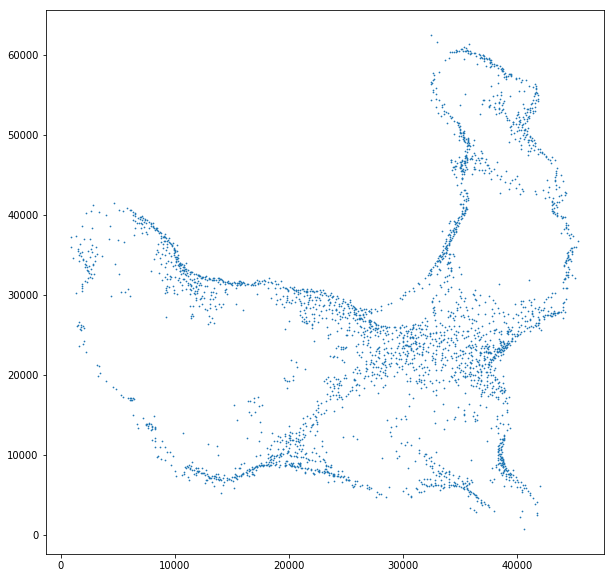

In [303]:
plt.figure(figsize=(10,10))
plt.scatter(df.x[::1], df.y[::1], s=0.5)

In [304]:
x_max = 46883
y_max = 63512

In [305]:
maxX = 46883
maxY = 63512
SizeTile = 256

Xo = np.arange(maxX)
Yo = np.arange(maxY)

Xto = Xo[::SizeTile]
Yto = Yo[::SizeTile]

In [114]:
x = df.loc[12].x
y = df.loc[12].y

In [115]:
# row = folder
# col = image

In [116]:
row, col = LocateTile(x,y,SizeTile)
level = 8

In [117]:
from matplotlib.image import imread

In [164]:
def GrabImage(level, row, col):
    fp = "data/Stitch_3/"+ str(level) +"/" + str(row) +"/" + str(col) + ".png"
    return imread(GetFilepath)

In [121]:
img = GrabImage(8, row, col)
img.shape

(256, 256, 4)

# Load images

In [306]:
import savewally
from importlib import reload
reload(savewally);

In [307]:
coords = df.sample(20)[["x", "y"]].values

In [308]:
from PIL import Image

In [309]:
k = 8  # level
FP = "data/Stitch_3/"
images = []
rows = []
cols = []
x_pixels = []
y_pixels = []

for c in coords:
    # print("coords:", c[0], c[1])
    row, col = savewally.LocateTile(c[0], c[1], savewally.SizeTile)
    rows.append(row)
    cols.append(col)
    # print("row, col:", row, col)
    fp = savewally.GetFilepath(k, row, col)
    # print(fp)
    im = Image.open(FP + fp)
    #im = imread(FP + fp)
    images.append(im)
    xpixel = c[0] - Xto[row]
    ypixel = c[1] - Yto[col]
    x_pixels.append(xpixel)
    y_pixels.append(ypixel)

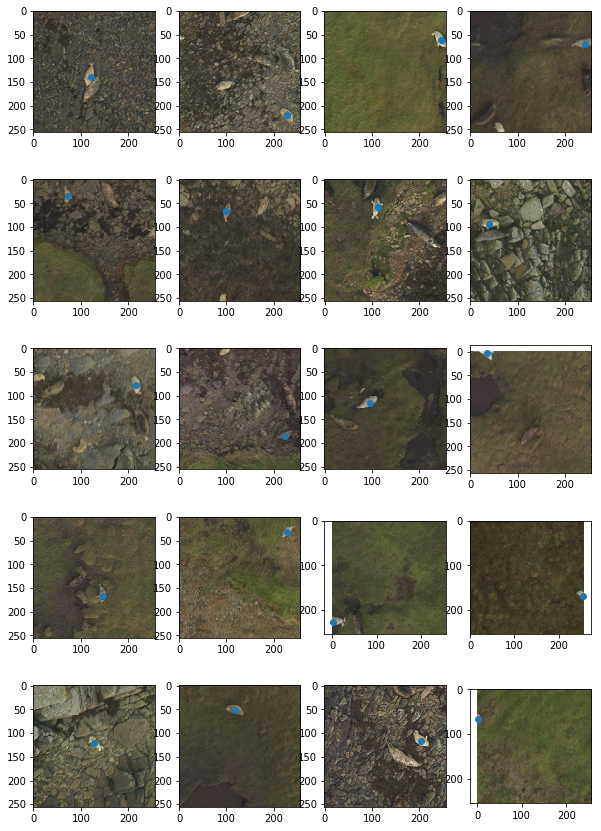

In [310]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(10,15))
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i])
    axi.scatter(x_pixels[i], 256 - y_pixels[i])

# Single tile SVC

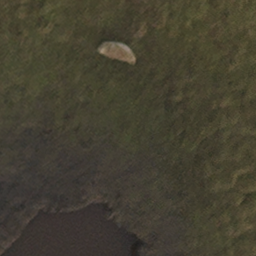

In [322]:
img = images[-3]
img

In [347]:
from sklearn.feature_extraction import image

In [374]:
patches = image.extract_patches_2d(np.asarray(img), (20,20), max_patches=200)

In [369]:
patches.shape

(1, 20, 20, 4)

In [380]:
xbound = 10
ybound = 10

In [383]:
centroid

(24, 72)

In [489]:
def box(c, dx, dy):
    return c[0] - dx, c[0] + dx, c[1] - dy, c[1] + dy

In [499]:
def extract_patch(img, x, y, dx, dy):
    # x, X, y, Y
    # bbox = (centroid[0] - xbound, centroid[0] + xbound, 256 - centroid[1] - ybound, 256 - centroid[1] + ybound)
    bbox = (x, x + dx, y, y + dy)
    # print(bbox)
    
    patch = np.asarray(img)[bbox[0]:bbox[1], bbox[2]:bbox[3]]
    return patch, bbox

In [501]:
dx, dy = 20, 20
x,y = x_pixels[-3], y_pixels[-3]
patch, bbox = extract_patch(images[-3], x, y, dx, dy)

In [455]:
from matplotlib.patches import Rectangle

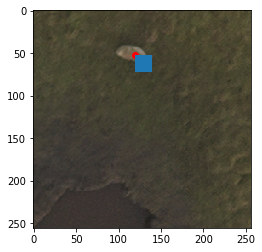

In [466]:
fig, ax = plt.subplots()
ax.imshow(np.asarray(images[-3]))
ax.scatter(x,256 - y, color="red")
ax.add_patch(Rectangle((x,256 - y), dx, dy))

In [487]:
i = -3
img = images[i]
patches = []
seal_bool = []
dx = 40
dy = 40

sealx, sealy = x_pixels[i], y_pixels[i]

for i in range(20):
    x,y = (np.random.randint(0, 256 - dx), 
         np.random.randint(0, 256 - dy))
    if sealx > x and sealx <= x + dx and sealy > y and sealy <= y + dy:
        seal_bool.append(True)
    else:
        seal_bool.append(False)
    # print(x,y)
    patches.append(extract_patch(img, x, y, dx, dy))

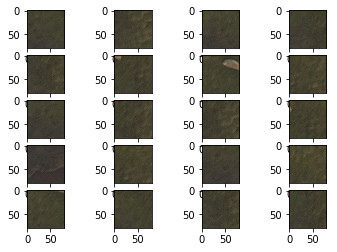

In [488]:
fig, axes = plt.subplots(nrows=5, ncols=4)
for patch, ax, seal in zip(patches, axes.flat, seal_bool):
    ax.imshow(patch)
    if seal:
        ax.scatter(5,5, color="red", s=0.2)

In [357]:
x_pixels[-3]

119

In [359]:
y_pixels[-3]

204

In [370]:
patches.shape

(1, 20, 20, 4)

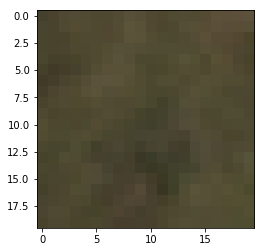

In [375]:
plt.imshow(patches[100])

In [353]:
patches.shape

(25, 20, 20, 4)

In [354]:
patch_shp = (20,20)